In [20]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [21]:
print('Tensorflow Version: {}'.format(tf.__version__))

Tensorflow Version: 2.7.0


In [22]:
zz=range(1000000)
x1=random.sample(zz,100000)
x2=random.sample(zz,100000)
#data=pd.DataFrame({"x":[i for i in range(1000)],"y":[i for i in range(1000)],"z":[y*2+15*x+3+random.uniform(-10,10) for x,y in enumerate(list(range(1000))) ]})
data=pd.DataFrame({"x1":[i for i in x1],
                   "x2":[i for i in x2],
                   "y":[x2_*2+15*x1_+3+random.gauss(0,2)
                        for x1_,x2_ in zip(x1,x2) ]})

In [23]:
data

,x1,x2,y
0,449434,371404,7.484321e+06
1,867373,879866,1.477033e+07
2,231632,590652,4.655789e+06
3,621042,260074,9.835780e+06
4,725147,4608,1.088642e+07
...,...,...,...
99995,587705,101278,9.018136e+06
99996,744344,107197,1.137955e+07
99997,355845,196660,5.730998e+06
99998,830032,872415,1.419531e+07


In [24]:
data.head()

,x1,x2,y
0,449434,371404,7.484321e+06
1,867373,879866,1.477033e+07
2,231632,590652,4.655789e+06
3,621042,260074,9.835780e+06
4,725147,4608,1.088642e+07


In [25]:
x = data[["x1","x2"]]
y = data["y"]

In [26]:
x.shape

(100000, 2)

In [27]:
y.shape

(100000,)

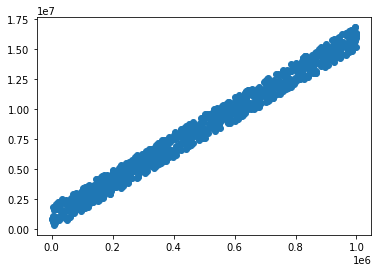

In [28]:
plt.scatter(data.x1[:1000],data.y[:1000])

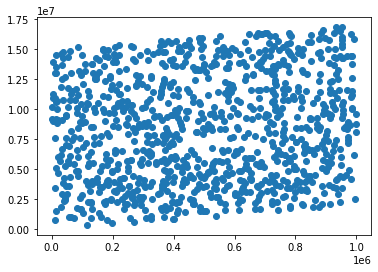

In [29]:
plt.scatter(data.x2[:1000],data.y[:1000])

In [30]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(100, input_shape=(2,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(1000))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1))


In [33]:
model.add(tf.keras.layers.Dense(1, input_shape=(2,)))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse')

In [37]:
ck_pt_cb=tf.keras.callbacks.ModelCheckpoint("best_model.h5",save_best_only=True)
ck_el_sp=tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history = model.fit(x, y, batch_size=512,epochs=500,callbacks=[ck_pt_cb,ck_el_sp])

Epoch 1/500
196/196 [==============================] - 0s 791us/step - loss: 95796871561216.0000
Epoch 2/500
196/196 [==============================] - 0s 798us/step - loss: 92860229615616.0000
Epoch 3/500
196/196 [==============================] - 0s 868us/step - loss: 90882724331520.0000
Epoch 4/500
196/196 [==============================] - 0s 897us/step - loss: 88086256025600.0000
Epoch 5/500
196/196 [==============================] - 0s 895us/step - loss: 82061389987840.0000
Epoch 6/500
196/196 [==============================] - 0s 849us/step - loss: 72132281237504.0000
Epoch 7/500
196/196 [==============================] - 0s 868us/step - loss: 59856329375744.0000
Epoch 8/500
196/196 [==============================] - 0s 882us/step - loss: 47122929942528.0000
Epoch 9/500
196/196 [==============================] - 0s 1ms/step - loss: 35360696434688.0000
Epoch 10/500
196/196 [==============================] - 0s 852us/step - loss: 25445286281216.0000
Epoch 11/500
196/196 [=========

Epoch 23/500
196/196 [==============================] - 0s 719us/step - loss: 1546066067456.0000
Epoch 24/500
196/196 [==============================] - 0s 764us/step - loss: 1225040461824.0000
Epoch 25/500
196/196 [==============================] - 0s 814us/step - loss: 943971696640.0000
Epoch 26/500
196/196 [==============================] - 0s 860us/step - loss: 704867860480.0000
Epoch 27/500
196/196 [==============================] - 0s 959us/step - loss: 507981234176.0000
Epoch 28/500
196/196 [==============================] - 0s 777us/step - loss: 351808323584.0000
Epoch 29/500
196/196 [==============================] - 0s 742us/step - loss: 233006661632.0000
Epoch 30/500
196/196 [==============================] - 0s 794us/step - loss: 146726633472.0000
Epoch 31/500
196/196 [==============================] - 0s 1ms/step - loss: 87389143040.0000
Epoch 32/500
196/196 [==============================] - 0s 764us/step - loss: 48908259328.0000
Epoch 33/500
196/196 [====================

196/196 [==============================] - 0s 1ms/step - loss: 2118.2764
Epoch 46/500
196/196 [==============================] - 0s 904us/step - loss: 726.0012
Epoch 47/500
196/196 [==============================] - 0s 825us/step - loss: 589.4351
Epoch 48/500
196/196 [==============================] - 0s 914us/step - loss: 495.0985
Epoch 49/500
196/196 [==============================] - 0s 1ms/step - loss: 394.8126
Epoch 50/500
196/196 [==============================] - 0s 828us/step - loss: 330.2625
Epoch 51/500
196/196 [==============================] - 0s 791us/step - loss: 260.5126
Epoch 52/500
196/196 [==============================] - 0s 777us/step - loss: 229.6805
Epoch 53/500
196/196 [==============================] - 0s 769us/step - loss: 171.8852
Epoch 54/500
196/196 [==============================] - 0s 765us/step - loss: 153.3650
Epoch 55/500
196/196 [==============================] - 0s 769us/step - loss: 130.9174
Epoch 56/500
196/196 [==============================] - 0s 

Epoch 69/500
196/196 [==============================] - 0s 987us/step - loss: 25.1425
Epoch 70/500
196/196 [==============================] - 0s 961us/step - loss: 23.7619
Epoch 71/500
196/196 [==============================] - 0s 951us/step - loss: 23.7619
Epoch 72/500
196/196 [==============================] - 0s 844us/step - loss: 22.3758
Epoch 73/500
196/196 [==============================] - 0s 913us/step - loss: 21.4923
Epoch 74/500
196/196 [==============================] - 0s 839us/step - loss: 21.4923
Epoch 75/500
196/196 [==============================] - 0s 854us/step - loss: 21.3125
Epoch 76/500
196/196 [==============================] - 0s 887us/step - loss: 20.7394
Epoch 77/500
196/196 [==============================] - 0s 891us/step - loss: 20.7398
Epoch 78/500
196/196 [==============================] - 0s 904us/step - loss: 20.7394
Epoch 79/500
196/196 [==============================] - 0s 858us/step - loss: 20.4222
Epoch 80/500
196/196 [==============================] 

196/196 [==============================] - 0s 851us/step - loss: 20.0802
Epoch 93/500
196/196 [==============================] - 0s 851us/step - loss: 20.0602
Epoch 94/500
196/196 [==============================] - 0s 787us/step - loss: 20.1516
Epoch 95/500
196/196 [==============================] - 0s 915us/step - loss: 20.2299
Epoch 96/500
196/196 [==============================] - 0s 925us/step - loss: 20.2921
Epoch 97/500
196/196 [==============================] - 0s 866us/step - loss: 20.3734
Epoch 98/500
196/196 [==============================] - 0s 859us/step - loss: 20.4695
Epoch 99/500
196/196 [==============================] - 0s 825us/step - loss: 20.4431
Epoch 100/500
196/196 [==============================] - 0s 853us/step - loss: 21.1564
Epoch 101/500
196/196 [==============================] - 0s 863us/step - loss: 20.9735
Epoch 102/500
196/196 [==============================] - 0s 877us/step - loss: 20.7008
Epoch 103/500
196/196 [==============================] - 0s 853u

196/196 [==============================] - 0s 949us/step - loss: 92537.6016
Epoch 116/500
196/196 [==============================] - 0s 889us/step - loss: 10655.3643
Epoch 117/500
196/196 [==============================] - 0s 813us/step - loss: 32.0825
Epoch 118/500
196/196 [==============================] - 0s 912us/step - loss: 33227.9453
Epoch 119/500
196/196 [==============================] - 0s 894us/step - loss: 38199.8125
Epoch 120/500
196/196 [==============================] - 0s 809us/step - loss: 17505.8516
Epoch 121/500
196/196 [==============================] - 0s 910us/step - loss: 22164.5410
Epoch 122/500
196/196 [==============================] - 0s 953us/step - loss: 64972.4023
Epoch 123/500
196/196 [==============================] - 0s 831us/step - loss: 2043.8992
Epoch 124/500
196/196 [==============================] - 0s 823us/step - loss: 36610.8125
Epoch 125/500
196/196 [==============================] - 0s 863us/step - loss: 78644.5312
Epoch 126/500
196/196 [=====

Epoch 139/500
196/196 [==============================] - 0s 865us/step - loss: 104561.5547
Epoch 140/500
196/196 [==============================] - 0s 790us/step - loss: 35.1652
Epoch 141/500
196/196 [==============================] - 0s 828us/step - loss: 378.6727
Epoch 142/500
196/196 [==============================] - 0s 969us/step - loss: 82443.8047
Epoch 143/500
196/196 [==============================] - 0s 823us/step - loss: 54.5152
Epoch 144/500
196/196 [==============================] - 0s 824us/step - loss: 62351.7344
Epoch 145/500
196/196 [==============================] - 0s 820us/step - loss: 51.5345
Epoch 146/500
196/196 [==============================] - 0s 1ms/step - loss: 34716.4141
Epoch 147/500
196/196 [==============================] - 0s 879us/step - loss: 56000.6289
Epoch 148/500
196/196 [==============================] - 0s 834us/step - loss: 18078.0000
Epoch 149/500
196/196 [==============================] - 0s 839us/step - loss: 99465.6875
Epoch 150/500
196/196 

196/196 [==============================] - 0s 885us/step - loss: 25385.1367
Epoch 163/500
196/196 [==============================] - 0s 869us/step - loss: 52702.7617
Epoch 164/500
196/196 [==============================] - 0s 958us/step - loss: 21536.4766
Epoch 165/500
196/196 [==============================] - 0s 866us/step - loss: 31127.6113
Epoch 166/500
196/196 [==============================] - 0s 940us/step - loss: 42029.9727
Epoch 167/500
196/196 [==============================] - 0s 899us/step - loss: 20361.4551
Epoch 168/500
196/196 [==============================] - 0s 817us/step - loss: 48955.0859
Epoch 169/500
196/196 [==============================] - 0s 982us/step - loss: 32134.3770
Epoch 170/500
196/196 [==============================] - 0s 852us/step - loss: 36557.9531
Epoch 171/500
196/196 [==============================] - 0s 853us/step - loss: 358.7379
Epoch 172/500
196/196 [==============================] - 0s 893us/step - loss: 42082.2109
Epoch 173/500
196/196 [===

196/196 [==============================] - 0s 858us/step - loss: 37203.7734
Epoch 186/500
196/196 [==============================] - 0s 801us/step - loss: 36465.6211
Epoch 187/500
196/196 [==============================] - 0s 796us/step - loss: 31525.8965
Epoch 188/500
196/196 [==============================] - 0s 964us/step - loss: 61739.0078
Epoch 189/500
196/196 [==============================] - 0s 874us/step - loss: 332.9460
Epoch 190/500
196/196 [==============================] - 0s 811us/step - loss: 66340.4531
Epoch 191/500
196/196 [==============================] - 0s 888us/step - loss: 52.6931
Epoch 192/500
196/196 [==============================] - 0s 847us/step - loss: 51115.0273
Epoch 193/500
196/196 [==============================] - 0s 797us/step - loss: 9456.8154
Epoch 194/500
196/196 [==============================] - 0s 849us/step - loss: 35034.1523
Epoch 195/500
196/196 [==============================] - 0s 851us/step - loss: 32652.5547
Epoch 196/500
196/196 [=======

196/196 [==============================] - 0s 805us/step - loss: 44.2124
Epoch 209/500
196/196 [==============================] - 0s 2ms/step - loss: 50067.0625
Epoch 210/500
196/196 [==============================] - 0s 891us/step - loss: 66231.6641
Epoch 211/500
196/196 [==============================] - 0s 1ms/step - loss: 1106.8573
Epoch 212/500
196/196 [==============================] - 0s 936us/step - loss: 107025.6016
Epoch 213/500
196/196 [==============================] - 0s 1ms/step - loss: 190.5652
Epoch 214/500
196/196 [==============================] - 0s 813us/step - loss: 46.1331
Epoch 215/500
196/196 [==============================] - 0s 851us/step - loss: 56298.2500
Epoch 216/500
196/196 [==============================] - 0s 881us/step - loss: 330.6696
Epoch 217/500
196/196 [==============================] - 0s 825us/step - loss: 96927.3750
Epoch 218/500
196/196 [==============================] - 0s 2ms/step - loss: 27.9666
Epoch 219/500
196/196 [======================

196/196 [==============================] - 0s 893us/step - loss: 29259.7734
Epoch 232/500
196/196 [==============================] - 0s 987us/step - loss: 6612.5605
Epoch 233/500
196/196 [==============================] - 0s 1ms/step - loss: 72791.8281
Epoch 234/500
196/196 [==============================] - 0s 1ms/step - loss: 236.0917
Epoch 235/500
196/196 [==============================] - 0s 1ms/step - loss: 38049.2656
Epoch 236/500
196/196 [==============================] - 0s 988us/step - loss: 69746.5469
Epoch 237/500
196/196 [==============================] - 0s 882us/step - loss: 151.4406
Epoch 238/500
196/196 [==============================] - 0s 1ms/step - loss: 33801.5508
Epoch 239/500
196/196 [==============================] - 0s 890us/step - loss: 57381.8828
Epoch 240/500
196/196 [==============================] - 0s 852us/step - loss: 115.7978
Epoch 241/500
196/196 [==============================] - 0s 1ms/step - loss: 59523.9609
Epoch 242/500
196/196 [==================

196/196 [==============================] - 0s 1ms/step - loss: 64788.0000
Epoch 255/500
196/196 [==============================] - 0s 1ms/step - loss: 58.1353
Epoch 256/500
196/196 [==============================] - 0s 2ms/step - loss: 54766.0195
Epoch 257/500
196/196 [==============================] - 0s 1ms/step - loss: 41327.0586
Epoch 258/500
196/196 [==============================] - 0s 1ms/step - loss: 19548.4727
Epoch 259/500
196/196 [==============================] - 0s 2ms/step - loss: 23502.4688
Epoch 260/500
196/196 [==============================] - 0s 2ms/step - loss: 35422.3398
Epoch 261/500
196/196 [==============================] - 0s 2ms/step - loss: 27688.7148
Epoch 262/500
196/196 [==============================] - 0s 2ms/step - loss: 38305.4492
Epoch 263/500
196/196 [==============================] - 1s 3ms/step - loss: 22638.2676
Epoch 264/500
196/196 [==============================] - 0s 1ms/step - loss: 49111.1523
Epoch 265/500
196/196 [==========================

196/196 [==============================] - 0s 1ms/step - loss: 85577.0156
Epoch 278/500
196/196 [==============================] - 0s 1ms/step - loss: 41.2089
Epoch 279/500
196/196 [==============================] - 0s 895us/step - loss: 37059.1016
Epoch 280/500
196/196 [==============================] - 0s 1ms/step - loss: 40085.8867
Epoch 281/500
196/196 [==============================] - 0s 1ms/step - loss: 7235.5347
Epoch 282/500
196/196 [==============================] - 0s 1ms/step - loss: 65003.0703
Epoch 283/500
196/196 [==============================] - 0s 1ms/step - loss: 8346.9365
Epoch 284/500
196/196 [==============================] - 1s 3ms/step - loss: 32495.4141
Epoch 285/500
196/196 [==============================] - 0s 2ms/step - loss: 24391.3750
Epoch 286/500
196/196 [==============================] - 0s 2ms/step - loss: 48692.3008
Epoch 287/500
196/196 [==============================] - 0s 2ms/step - loss: 27976.2910
Epoch 288/500
196/196 [==========================

196/196 [==============================] - 0s 933us/step - loss: 342.6980
Epoch 301/500
196/196 [==============================] - 0s 918us/step - loss: 88481.3594
Epoch 302/500
196/196 [==============================] - 0s 891us/step - loss: 23.7664
Epoch 303/500
196/196 [==============================] - 0s 896us/step - loss: 18201.2129
Epoch 304/500
196/196 [==============================] - 0s 863us/step - loss: 35227.5156
Epoch 305/500
196/196 [==============================] - 0s 854us/step - loss: 28009.5918
Epoch 306/500
196/196 [==============================] - 0s 858us/step - loss: 46010.6055
Epoch 307/500
196/196 [==============================] - 0s 928us/step - loss: 47691.9414
Epoch 308/500
196/196 [==============================] - 0s 874us/step - loss: 316.5979
Epoch 309/500
196/196 [==============================] - 0s 919us/step - loss: 35862.2891
Epoch 310/500
196/196 [==============================] - 0s 962us/step - loss: 50113.8750
Epoch 311/500
196/196 [========

196/196 [==============================] - 0s 1ms/step - loss: 3499.4214
Epoch 324/500
196/196 [==============================] - 0s 1ms/step - loss: 23720.7852
Epoch 325/500
196/196 [==============================] - 0s 908us/step - loss: 89478.3281
Epoch 326/500
196/196 [==============================] - 0s 881us/step - loss: 27.6772
Epoch 327/500
196/196 [==============================] - 0s 867us/step - loss: 58136.2852
Epoch 328/500
196/196 [==============================] - 0s 856us/step - loss: 103.6035
Epoch 329/500
196/196 [==============================] - 0s 875us/step - loss: 45999.8359
Epoch 330/500
196/196 [==============================] - 0s 856us/step - loss: 36064.4922
Epoch 331/500
196/196 [==============================] - 0s 844us/step - loss: 32241.5215
Epoch 332/500
196/196 [==============================] - 0s 854us/step - loss: 38568.8438
Epoch 333/500
196/196 [==============================] - 0s 850us/step - loss: 17111.9941
Epoch 334/500
196/196 [===========

196/196 [==============================] - 0s 919us/step - loss: 51122.1758
Epoch 347/500
196/196 [==============================] - 0s 898us/step - loss: 21005.0254
Epoch 348/500
196/196 [==============================] - 0s 864us/step - loss: 98871.1328
Epoch 349/500
196/196 [==============================] - 0s 870us/step - loss: 23.7605
Epoch 350/500
196/196 [==============================] - 0s 854us/step - loss: 55286.9922
Epoch 351/500
196/196 [==============================] - 0s 881us/step - loss: 899.6655
Epoch 352/500
196/196 [==============================] - 0s 847us/step - loss: 67836.0000
Epoch 353/500
196/196 [==============================] - 0s 872us/step - loss: 54.0745
Epoch 354/500
196/196 [==============================] - 0s 1ms/step - loss: 45042.9336
Epoch 355/500
196/196 [==============================] - 0s 1ms/step - loss: 62642.0742
Epoch 356/500
196/196 [==============================] - 0s 1ms/step - loss: 707.4419
Epoch 357/500
196/196 [=================

196/196 [==============================] - 0s 882us/step - loss: 76437.7656
Epoch 370/500
196/196 [==============================] - 0s 948us/step - loss: 38.5397
Epoch 371/500
196/196 [==============================] - 0s 879us/step - loss: 34784.0742
Epoch 372/500
196/196 [==============================] - 0s 852us/step - loss: 38510.7109
Epoch 373/500
196/196 [==============================] - 0s 924us/step - loss: 41518.5430
Epoch 374/500
196/196 [==============================] - 0s 915us/step - loss: 47286.1758
Epoch 375/500
196/196 [==============================] - 0s 926us/step - loss: 35385.0898
Epoch 376/500
196/196 [==============================] - 0s 901us/step - loss: 86.6163
Epoch 377/500
196/196 [==============================] - 0s 980us/step - loss: 92231.8984
Epoch 378/500
196/196 [==============================] - 0s 960us/step - loss: 20.5385
Epoch 379/500
196/196 [==============================] - 0s 934us/step - loss: 69808.9766
Epoch 380/500
196/196 [==========

196/196 [==============================] - 0s 2ms/step - loss: 24057.9062
Epoch 393/500
196/196 [==============================] - 0s 1ms/step - loss: 67706.7656
Epoch 394/500
196/196 [==============================] - 0s 1ms/step - loss: 1164.7086
Epoch 395/500
196/196 [==============================] - 0s 1ms/step - loss: 36306.9961
Epoch 396/500
196/196 [==============================] - 0s 1ms/step - loss: 38703.0820
Epoch 397/500
196/196 [==============================] - 0s 1ms/step - loss: 52270.8789
Epoch 398/500
196/196 [==============================] - 0s 1ms/step - loss: 192.3126
Epoch 399/500
196/196 [==============================] - 0s 1ms/step - loss: 35245.9102
Epoch 400/500
196/196 [==============================] - 0s 1ms/step - loss: 46860.0820
Epoch 401/500
196/196 [==============================] - 0s 1ms/step - loss: 34352.4062
Epoch 402/500
196/196 [==============================] - 0s 1ms/step - loss: 15507.0361
Epoch 403/500
196/196 [==========================

196/196 [==============================] - 0s 977us/step - loss: 76235.5234
Epoch 416/500
196/196 [==============================] - 0s 893us/step - loss: 46.7220
Epoch 417/500
196/196 [==============================] - 0s 947us/step - loss: 55158.5859
Epoch 418/500
196/196 [==============================] - 0s 919us/step - loss: 31216.3848
Epoch 419/500
196/196 [==============================] - 0s 916us/step - loss: 16900.1152
Epoch 420/500
196/196 [==============================] - 0s 969us/step - loss: 54388.1016
Epoch 421/500
196/196 [==============================] - 0s 988us/step - loss: 22441.2910
Epoch 422/500
196/196 [==============================] - 0s 925us/step - loss: 48151.0742
Epoch 423/500
196/196 [==============================] - 0s 939us/step - loss: 114.1196
Epoch 424/500
196/196 [==============================] - 0s 1ms/step - loss: 38311.0703
Epoch 425/500
196/196 [==============================] - 0s 976us/step - loss: 39715.4844
Epoch 426/500
196/196 [========

196/196 [==============================] - 0s 933us/step - loss: 30056.1758
Epoch 439/500
196/196 [==============================] - 0s 925us/step - loss: 29870.0410
Epoch 440/500
196/196 [==============================] - 0s 891us/step - loss: 19509.3867
Epoch 441/500
196/196 [==============================] - 0s 862us/step - loss: 37753.5859
Epoch 442/500
196/196 [==============================] - 0s 864us/step - loss: 72921.5547
Epoch 443/500
196/196 [==============================] - 0s 913us/step - loss: 108.6147
Epoch 444/500
196/196 [==============================] - 0s 965us/step - loss: 26005.0312
Epoch 445/500
196/196 [==============================] - 0s 919us/step - loss: 51305.1953
Epoch 446/500
196/196 [==============================] - 0s 875us/step - loss: 36760.1445
Epoch 447/500
196/196 [==============================] - 0s 971us/step - loss: 24991.0391
Epoch 448/500
196/196 [==============================] - 0s 951us/step - loss: 91151.3359
Epoch 449/500
196/196 [===

196/196 [==============================] - 0s 972us/step - loss: 46939.3086
Epoch 462/500
196/196 [==============================] - 0s 932us/step - loss: 17116.7305
Epoch 463/500
196/196 [==============================] - 0s 973us/step - loss: 29894.7656
Epoch 464/500
196/196 [==============================] - 0s 1ms/step - loss: 27793.8379
Epoch 465/500
196/196 [==============================] - 0s 994us/step - loss: 95827.0703
Epoch 466/500
196/196 [==============================] - 0s 922us/step - loss: 34.0773
Epoch 467/500
196/196 [==============================] - 0s 927us/step - loss: 21272.4766
Epoch 468/500
196/196 [==============================] - 0s 1ms/step - loss: 32739.8496
Epoch 469/500
196/196 [==============================] - 0s 965us/step - loss: 26439.0664
Epoch 470/500
196/196 [==============================] - 0s 979us/step - loss: 30882.7051
Epoch 471/500
196/196 [==============================] - 0s 948us/step - loss: 165262.2656
Epoch 472/500
196/196 [=======

196/196 [==============================] - 0s 999us/step - loss: 78294.2031
Epoch 485/500
196/196 [==============================] - 0s 994us/step - loss: 82.4997
Epoch 486/500
196/196 [==============================] - 0s 939us/step - loss: 29498.0605
Epoch 487/500
196/196 [==============================] - 0s 906us/step - loss: 68428.9766
Epoch 488/500
196/196 [==============================] - 0s 875us/step - loss: 1347.9757
Epoch 489/500
196/196 [==============================] - 0s 911us/step - loss: 71391.0000
Epoch 490/500
196/196 [==============================] - 0s 902us/step - loss: 164.6822
Epoch 491/500
196/196 [==============================] - 0s 940us/step - loss: 31414.1387
Epoch 492/500
196/196 [==============================] - 0s 970us/step - loss: 30051.7871
Epoch 493/500
196/196 [==============================] - 0s 929us/step - loss: 40148.9375
Epoch 494/500
196/196 [==============================] - 0s 924us/step - loss: 45008.3633
Epoch 495/500
196/196 [=======

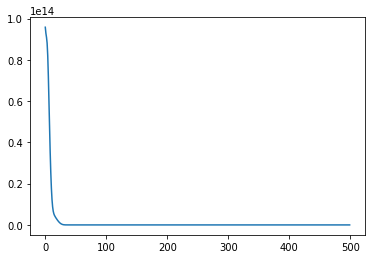

In [38]:
plt.plot(history.epoch, history.history.get('loss'))

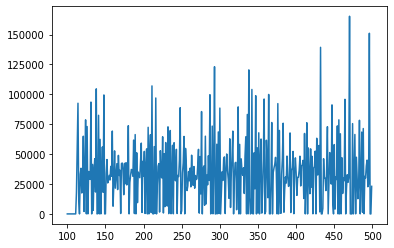

In [42]:
plt.plot(history.epoch[100:], history.history.get('loss')[100:])

In [40]:
model.predict([[17,4],[7,23],[100,0]])

array([[ 273.52536],
       [ 161.52512],
       [1510.5504 ]], dtype=float32)

In [41]:
[2*y+15*x+3  for x,y in [[17,4],[7,23],[100,0]] ]

[266, 154, 1503]

In [43]:
model.trainable_variables

[<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-3.8029106],
        [-0.5070825]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-2.2855902], dtype=float32)>,
 <tf.Variable 'dense_2/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-3.944429]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([1.504121], dtype=float32)>]

In [45]:
model_best=tf.keras.models.load_model("best_model.h5")  #loss最小的模型的泛化性能不是最好

In [46]:
model_best.predict([[17,4],[7,23],[100,0]])

array([[196.94911],
       [220.3392 ],
       [964.82385]], dtype=float32)